In [2]:
import pandas as pd
from sklearn.metrics import mutual_info_score
import numpy as np

link = 'https://raw.githubusercontent.com/farisknight13/Python_ML/main/Dataset_2.csv'
df = pd.read_csv(link)
df

,CaseID,Name,Social_Security_No,Age,Sex,Status,Income,GPA,Class
0,1,John,123321,22,Male,Student,3000,3.22,Invite
1,2,Mary,343422,38,Female,Employee,32000,2.00,Invite
2,3,Ali,876345,46,Male,Employee,69000,2.90,Invite
3,4,Lee,673245,23,Male,Student,3500,3.10,Invite
4,5,Ted,451087,45,Male,Unemployed,5000,3.10,Don't
5,6,Nick,239847,19,Male,Student,1300,3.80,Don't
6,7,Liz,229951,23,Female,Student,12000,2.80,Don't
7,8,Debby,234819,33,Female,Unemployed,5000,0.00,Don't
8,9,Pat,258199,32,Male,Student,1000,2.10,Don't
9,10,Peter,813672,20,Male,Student,32000,3.90,Don't


# แก้ไขข้อมูลให้อยู่ในรูปตัวแปร Dummy

In [3]:
df_x = df.iloc[:,2:-1].copy()
df_y = df.iloc[:,-1].copy()
df_y = df_y.replace(["Don't",'Invite'],[0,1])
dummy = pd.get_dummies(df_x['Sex'])
df_x = pd.concat([df_x,dummy],axis=1)
dummy1 = pd.get_dummies(df_x['Status'])
df_x = pd.concat([df_x,dummy1],axis=1)
df_x = df_x.drop(['Sex'],axis=1)
df_x = df_x.drop(['Status'],axis=1)
df_x

,Social_Security_No,Age,Income,GPA,Female,Male,Employee,Student,Unemployed
0,123321,22,3000,3.22,0,1,0,1,0
1,343422,38,32000,2.00,1,0,1,0,0
2,876345,46,69000,2.90,0,1,1,0,0
3,673245,23,3500,3.10,0,1,0,1,0
4,451087,45,5000,3.10,0,1,0,0,1
5,239847,19,1300,3.80,0,1,0,1,0
6,229951,23,12000,2.80,1,0,0,1,0
7,234819,33,5000,0.00,1,0,0,0,1
8,258199,32,1000,2.10,0,1,0,1,0
9,813672,20,32000,3.90,0,1,0,1,0


# การแบ่งข้อมูล Train และ Test

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import sklearn as sk
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt

def evaluation_accuracy(prediction,actual):
	acc = sum(prediction==actual)/len(prediction)
	return acc

In [5]:
y = df_y
X = df_x

In [6]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Decision Tree

In [7]:
#DecisionTree
clf_NDT = DecisionTreeClassifier(random_state=0, max_depth=2)
clf_NDT = clf_NDT.fit(X1_train,y1_train)
y_pred_NDT = clf_NDT.predict(X1_test)
print('Accuracy DecisionTree =',evaluation_accuracy(y_pred_NDT,y1_test))

Accuracy DecisionTree = 0.2


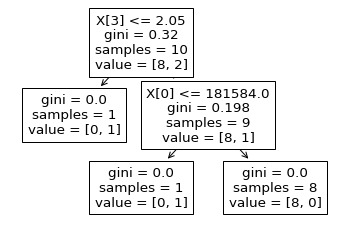

In [8]:
# plot decision tree
# plot single tree
tree.plot_tree(clf_NDT)
plt.show()

# Random Forest

In [16]:
#RandomForest
clf_NRF = RandomForestClassifier(max_depth=2, random_state=0)
clf_NRF = clf_NRF.fit(X1_train,y1_train)
y_pred_NRF = clf_NRF.predict(X1_test)
print('Accuracy RandomForest =',evaluation_accuracy(y_pred_NRF,y1_test))

Accuracy RandomForest = 0.4


In [13]:
fn=df_x.columns
cn=df_y.name
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=3000)
for index in range(0, 5):
    tree.plot_tree(clf_NRF.estimators_[index],
                   feature_names = fn, 
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);
    
    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)

# XGBoost

In [14]:
#XGBoost
regressor = XGBClassifier()
regressor.fit(X1_train,y1_train)
y_pred_XGB = regressor.predict(X1_test)
print('Accuracy XGBoost =',evaluation_accuracy(y_pred_XGB,y1_test))

Accuracy XGBoost = 0.4


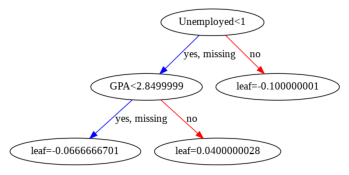

In [15]:
# plot decision tree
# fit model no training data
model = XGBClassifier()
model.fit(X, y)
# plot single tree
plot_tree(model)
plt.show()

# Cross validation

In [18]:
from sklearn.model_selection import cross_val_score
NDT = cross_val_score(clf_NDT, X, y, cv=7)
print("Accuracy Decision Tree: %0.2f (+/- %0.2f)" % (NDT.mean(), NDT.std() * 2))
NRF = cross_val_score(clf_NRF, X, y, cv=7)
print("Accuracy RandomForest: %0.2f (+/- %0.2f)" % (NRF.mean(), NRF.std() * 2))
XGB = cross_val_score(model, X, y, cv=7)
print("Accuracy XGBoost: %0.2f (+/- %0.2f)" % (XGB.mean(), XGB.std() * 2))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=7.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=7.
  % (min_groups, self.n_splits)), UserWarning)


Accuracy Decision Tree: 0.17 (+/- 0.53)
Accuracy RandomForest: 0.45 (+/- 0.66)
Accuracy XGBoost: 0.45 (+/- 0.66)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=7.
  % (min_groups, self.n_splits)), UserWarning)
